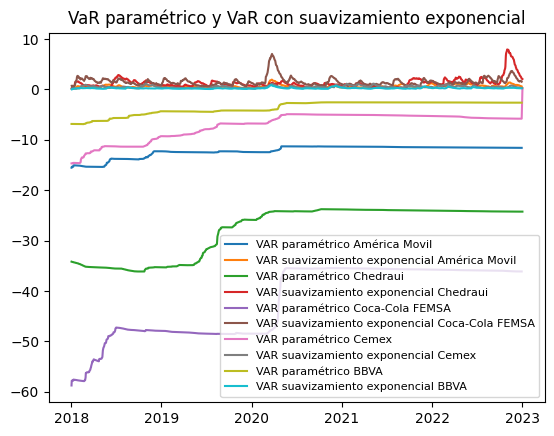

In [39]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt


# Obtener los datos de los últimos 5 años de América Móvil desde YahooFinance
amx = yf.Ticker("AMX").history(period="5y")
# Obtener los datos de los últimos 5 años de Chedraui desde YahooFinance
chedraui = yf.Ticker("CHDRAUIB.MX").history(period="5y")
# Obtener los datos de los últimos 5 años de Coca-Cola FEMSA desde YahooFinance
cc = yf.Ticker("KOF").history(period="5y")
# Obtener los datos de los últimos 5 años de CEMEX desde YahooFinance
cemex = yf.Ticker("CEMEXCPO.MX").history(period="5y")
# Obtener los datos de los últimos 5 años de BBVA desde YahooFinance
bbva = yf.Ticker("BBVA").history(period="5y")


# Calcular el VAR paramétrico para cada día de los últimos 5 años
alpha = 0.95  # Nivel de confianza del VAR

amx_var_parametrico = np.zeros(len(amx.index))  # Vector de ceros del mismo tamaño que amx
for i in range(len(amx.index)):
    # Calcular el VAR paramétrico para cada día considerando solo los precios anteriores
    amx_var_parametrico[i] = -np.percentile(amx["Close"][:i+1], 100*(1-alpha))
    
chedraui_var_parametrico = np.zeros(len(chedraui.index))
for i in range(len(chedraui.index)):
    chedraui_var_parametrico[i] = -np.percentile(chedraui["Close"][:i+1], 100*(1-alpha))
    

cc_var_parametrico = np.zeros(len(cc.index))  # Vector de ceros del mismo tamaño que cc
for i in range(len(cc.index)):
    # Calcular el VAR paramétrico para cada día considerando solo los precios anteriores
    cc_var_parametrico[i] = -np.percentile(cc["Close"][:i+1], 100*(1-alpha))
    

cemex_var_parametrico = np.zeros(len(cemex.index))
for i in range(len(cc.index)):
    # Calcular el VAR paramétrico para cada día considerando solo los precios anteriores
    cemex_var_parametrico[i] = -np.percentile(cemex["Close"][:i+1], 100*(1-alpha))
    

bbva_var_parametrico = np.zeros(len(bbva.index))  # Vector de ceros del mismo tamaño que bbva
for i in range(len(bbva.index)):
    # Calcular el VAR paramétrico para cada día considerando solo los precios anteriores
    bbva_var_parametrico[i] = -np.percentile(bbva["Close"][:i+1], 100*(1-alpha))
    

# Calcular el VAR con suavizamiento exponencial para cada día de los últimos 5 años
alpha = 0.1  # Tasa de suavizamiento
amx_var_exponential = amx["Close"].ewm(alpha=alpha).std()
chedraui_var_exponential = chedraui["Close"].ewm(alpha=alpha).std()
cc_var_exponential = cc["Close"].ewm(alpha=alpha).std()
cemex_var_exponential = cemex["Close"].ewm(alpha=alpha).std()
bbva_var_exponential = bbva["Close"].ewm(alpha=alpha).std()




# Graficar el comportamiento del VAR paramétrico y el VAR con suavizamiento exponencial para América Móvil
plt.plot(amx.index, amx_var_parametrico, label="VAR paramétrico América Movil")
plt.plot(amx.index, amx_var_exponential, label="VAR suavizamiento exponencial América Movil")

plt.plot(chedraui.index, chedraui_var_parametrico, label="VAR paramétrico Chedraui")
plt.plot(chedraui.index, chedraui_var_exponential, label="VAR suavizamiento exponencial Chedraui")

plt.plot(cc.index, cc_var_parametrico, label="VAR paramétrico Coca-Cola FEMSA")
plt.plot(cc.index, cc_var_exponential, label="VAR suavizamiento exponencial Coca-Cola FEMSA")

plt.plot(cemex.index, cemex_var_parametrico, label="VAR paramétrico Cemex")
plt.plot(cemex.index, cemex_var_exponential, label="VAR suavizamiento exponencial Cemex")

plt.plot(bbva.index, bbva_var_parametrico, label="VAR paramétrico BBVA")
plt.plot(bbva.index, bbva_var_exponential, label="VAR suavizamiento exponencial BBVA")


plt.title("VaR paramétrico y VaR con suavizamiento exponencial")
plt.legend(loc="lower right", fontsize=8)
plt.show()